# 2025 March Madness Tournament Winner Prediction

March Madness

### Import Libraries

In [1]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Cleaning

In [2]:
# Read in Dataset of Division 1 College Basketball Teams from 2013-2023 Seasons
# Dataset link: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download&select=cbb.csv
historical_seasons = pd.read_csv('cbb.csv')
historical_seasons.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [3]:
# Check for missing values
historical_seasons.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    2843
SEED          2843
YEAR             0
dtype: int64

Postseason and Seed have many missing values because it represents seasons in which teams did not qualify for the March Madness Tournament. Note: Only 64 teams qualify every year.

In [4]:
# Check for duplicate rows
historical_seasons.duplicated().sum()

0

In [5]:
# Read in Basic Stats DataSet of 2024-25 Division 1 College Basketball Teams, as of date: Feb. 26, 2025
# From Sports Reference: https://www.sports-reference.com/cbb/seasons/men/2025-school-stats.html
current_season_basic = pd.read_csv('2024-25 College Basketball Basic Stats.csv')
current_season_basic.head()

,Rk,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,Auburn,27,25,2,0.926,30.31,14.13,13,1,...,406,548,0.741,333,1044,449,193,176,246,490
1,2,Drake,28,25,3,0.893,9.20,0.47,15,3,...,422,600,0.703,285,863,374,250,62,324,450
2,3,Duke,28,25,3,0.893,30.56,8.99,16,1,...,405,520,0.779,306,1073,482,195,98,267,445
3,4,High Point,30,25,5,0.833,5.42,-5.29,13,2,...,514,666,0.772,329,1082,391,183,86,309,553
4,5,Saint Mary's (CA),29,25,4,0.862,18.50,5.54,15,1,...,369,532,0.694,403,1143,464,192,117,282,434


In [6]:
# Drop uncessary column Rank, since it is ranking by win percentage instead of other factors such as Strength of Schedule
current_season_basic = current_season_basic.drop(columns=['Rk'])

In [7]:
# Check for missing values
current_season_basic.isnull().sum()

School          0
Games           0
W               0
L               0
W-L%            0
SRS             0
SOS             0
Conf. W         0
Conf. L         0
Home W          0
Home L          0
Away W          0
Away L          0
Team Pts        0
Opponent Pts    0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
FT              0
FTA             0
FT%             0
ORB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
dtype: int64

In [8]:
# Check for duplicate rows
current_season_basic.duplicated().sum()

0

In [9]:
# Read in Advanced Stats DataSet of 2024-25 Division 1 College Basketball Teams, as of date: Feb. 26, 2025
# From Sports Reference: https://www.sports-reference.com/cbb/seasons/men/2025-advanced-school-stats.html
current_season_adv = pd.read_csv('2024-25 College Basketball Advanced Stats.csv')
current_season_adv.head()

,Rk,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
0,1,Auburn,27,25,2,0.926,30.31,14.13,13,1,...,0.407,0.584,53.8,55.4,10.3,17.1,0.554,11.2,35.7,0.240
1,2,Drake,28,25,3,0.893,9.20,0.47,15,3,...,0.368,0.589,55.7,54.3,14.5,7.7,0.558,16.1,36.5,0.300
2,3,Duke,28,25,3,0.893,30.56,8.99,16,1,...,0.453,0.612,55.9,59.7,10.5,9.9,0.580,12.4,34.7,0.247
3,4,High Point,30,25,5,0.833,5.42,-5.29,13,2,...,0.392,0.603,54.1,45.9,9.1,7.9,0.565,13.1,35.0,0.297
4,5,Saint Mary's (CA),29,25,4,0.862,18.50,5.54,15,1,...,0.341,0.544,57.0,57.9,10.2,10.7,0.517,12.4,39.7,0.212


In [10]:
# Drop unecessary columns, since dataframes will be merged later on
current_season_adv = current_season_adv.drop(columns=['Rk', 'Games', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Conf. W', 'Conf. L', 'Home W',
                                                      'Home L', 'Away W', 'Away L', 'Team Pts', 'Opponent Pts'])

In [11]:
# Merge dataframes by School
merged_current_season_df = pd.merge(current_season_basic, current_season_adv, on='School')
merged_current_season_df.head()

,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
0,Auburn,27,25,2,0.926,30.31,14.13,13,1,12,...,0.407,0.584,53.8,55.4,10.3,17.1,0.554,11.2,35.7,0.240
1,Drake,28,25,3,0.893,9.20,0.47,15,3,13,...,0.368,0.589,55.7,54.3,14.5,7.7,0.558,16.1,36.5,0.300
2,Duke,28,25,3,0.893,30.56,8.99,16,1,15,...,0.453,0.612,55.9,59.7,10.5,9.9,0.580,12.4,34.7,0.247
3,High Point,30,25,5,0.833,5.42,-5.29,13,2,15,...,0.392,0.603,54.1,45.9,9.1,7.9,0.565,13.1,35.0,0.297
4,Saint Mary's (CA),29,25,4,0.862,18.50,5.54,15,1,15,...,0.341,0.544,57.0,57.9,10.2,10.7,0.517,12.4,39.7,0.212


In [12]:
merged_current_season_df.shape

(364, 45)

## Exploratory Data Analysis

In [13]:
historical_seasons.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,...,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,680.000000,3523.000000
mean,30.486233,15.990633,103.151320,103.153250,0.494067,49.887823,50.087113,18.696509,18.625092,29.308544,...,34.529066,34.802555,49.112433,49.289299,34.185580,34.369316,67.735339,-7.579620,8.801471,2017.828555
std,3.951584,6.572893,7.264859,6.511989,0.255338,3.078505,2.894967,2.104119,2.241067,4.214131,...,5.514264,6.396757,3.400389,3.317012,2.729186,2.435546,3.091703,6.815976,4.673461,3.257824
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,...,19.600000,16.500000,37.700000,37.700000,24.900000,26.100000,57.200000,-25.200000,1.000000,2013.000000
25%,29.000000,11.000000,98.200000,98.400000,0.281300,47.900000,48.100000,17.300000,17.100000,26.500000,...,30.600000,30.200000,46.800000,47.100000,32.300000,32.700000,65.700000,-12.600000,5.000000,2015.000000
50%,31.000000,16.000000,102.800000,103.200000,0.475600,49.800000,50.100000,18.600000,18.500000,29.400000,...,34.300000,34.100000,49.000000,49.300000,34.100000,34.300000,67.700000,-7.900000,9.000000,2018.000000
75%,33.000000,21.000000,107.900000,107.800000,0.714250,51.900000,52.000000,20.000000,20.100000,32.100000,...,38.100000,38.800000,51.300000,51.500000,36.000000,36.000000,69.700000,-3.000000,13.000000,2021.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,...,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2023.000000


In [14]:
historical_seasons['W-L%'] = historical_seasons['W'] / historical_seasons['G']

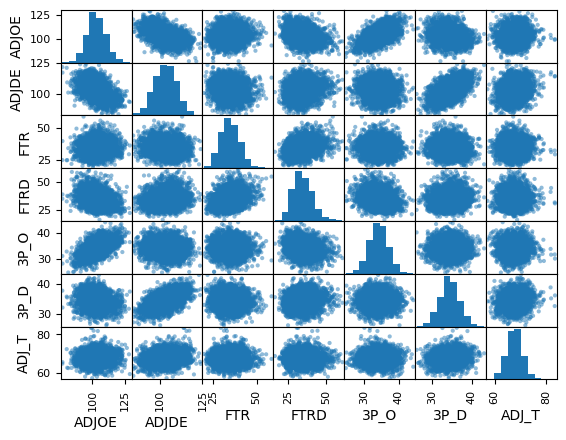

In [15]:
features = ['ADJOE', 'ADJDE', 'FTR', 'FTRD', '3P_O', '3P_D', 'ADJ_T']
fig1 = scatter_matrix(historical_seasons[features])

In [ ]:
# Remove teams with W-L% >= 1.0, no team has been undefeated for an entire season since 1975-76
historical_seasons = historical_seasons[historical_seasons['W-L%'] < 1.0]

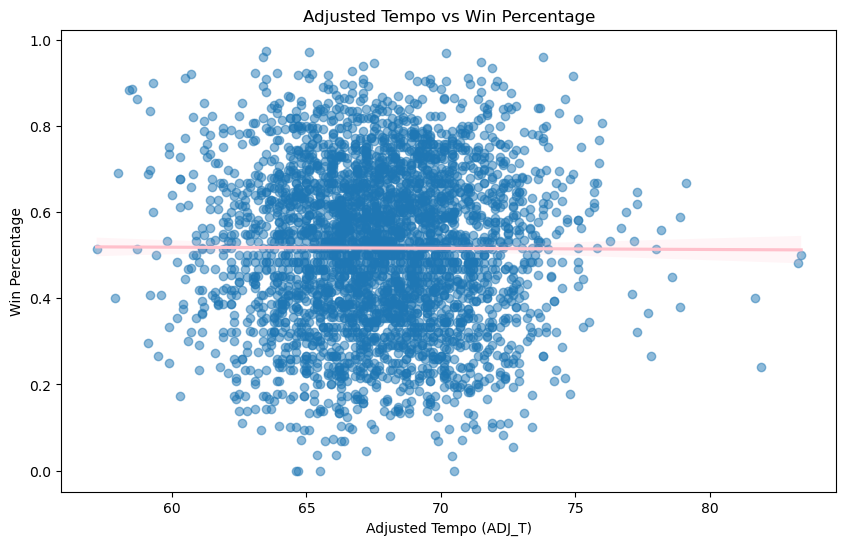

In [17]:
# Do teams that play faster, win more games?
plt.figure(figsize=(10,6))
sns.regplot(data=historical_seasons, x='ADJ_T', y='W-L%', scatter_kws={"alpha": 0.5}, line_kws={"color": "pink"})
plt.xlabel('Adjusted Tempo (ADJ_T)') # number of posessions in 40 mins
plt.ylabel('Win Percentage')
plt.title('Adjusted Tempo vs Win Percentage')
plt.show()

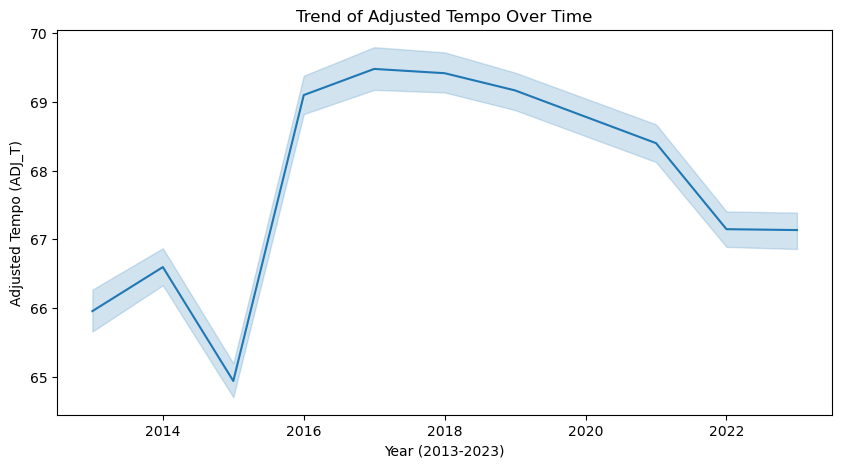

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=historical_seasons, x='YEAR', y='ADJ_T')
plt.xlabel('Year (2013-2023)')
plt.ylabel('Adjusted Tempo (ADJ_T)')
plt.title('Trend of Adjusted Tempo Over Time')
plt.show()

In [19]:
merged_current_season_df.describe()

,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,28.098901,14.758242,13.340659,0.525896,-0.201209,-0.126566,7.835165,7.835165,9.409341,4.291209,...,0.391802,0.547527,50.649725,52.478846,10.013187,9.556319,0.514797,14.980769,30.414286,0.237036
std,1.208828,4.838074,4.940349,0.172803,11.176450,6.095292,3.470501,3.477638,3.092695,2.446751,...,0.053909,0.027086,2.679866,5.282334,1.789160,2.596870,0.028839,1.729381,4.182578,0.036081
min,24.000000,3.000000,2.000000,0.103000,-34.770000,-10.510000,0.000000,0.000000,0.000000,0.000000,...,0.220000,0.461000,41.600000,39.500000,5.200000,4.300000,0.426000,11.000000,17.900000,0.156000
25%,27.000000,11.000000,10.000000,0.412250,-8.262500,-4.300000,5.000000,5.000000,7.000000,2.000000,...,0.354750,0.529750,48.975000,48.875000,8.875000,7.700000,0.496000,13.800000,27.700000,0.212000
50%,28.000000,15.000000,13.000000,0.536000,-2.400000,-2.035000,8.000000,8.000000,10.000000,4.000000,...,0.386000,0.548000,50.700000,52.300000,9.900000,9.300000,0.515500,14.900000,30.500000,0.234000
75%,29.000000,18.000000,17.000000,0.655000,7.195000,4.755000,11.000000,10.000000,12.000000,6.000000,...,0.429250,0.564250,52.425000,56.300000,11.125000,11.200000,0.532250,16.000000,33.125000,0.258000
max,31.000000,25.000000,26.000000,0.926000,30.560000,14.860000,17.000000,17.000000,18.000000,13.000000,...,0.540000,0.620000,57.500000,67.300000,15.200000,19.000000,0.588000,22.800000,41.800000,0.342000


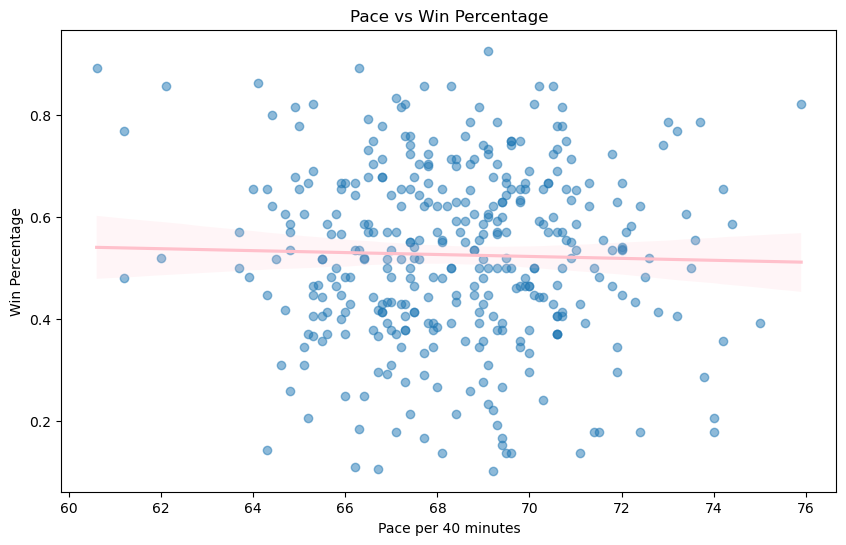

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(data=merged_current_season_df, x='Pace', y='W-L%', scatter_kws={"alpha": 0.5}, line_kws={"color": "pink"})
plt.xlabel('Pace per 40 minutes') # number of posessions in 40 mins
plt.ylabel('Win Percentage')
plt.title('Pace vs Win Percentage')
plt.show()

In [21]:
champions = historical_seasons[historical_seasons['POSTSEASON'] == 'Champions']
champions

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,W-L%
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015,0.897436
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019,0.921053
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017,0.846154
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,0.875000
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018,0.900000
12,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,48.1,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014,0.800000
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013,0.875000
2456,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,54.1,48.1,41.8,34.0,68.8,6.6,Champions,1.0,2021,0.916667
2803,Kansas,B12,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,...,53.6,46.4,36.1,29.8,69.1,10.4,Champions,1.0,2022,0.850000
3172,Connecticut,BE,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,...,53.6,44.4,36.3,29.7,66.7,5.0,Champions,4.0,2023,0.794872
